In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
dataset_name = "Chinatown"
coef = 0.1
model = "dt"

In [8]:
dataset = pd.read_csv(f"dataset/{dataset_name}/{dataset_name}_TRAIN.csv")
dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att16,att17,att18,att19,att20,att21,att22,att23,att24,target
0,573,375,301,212,55,34,25,33,113,143,...,1081,866,1096,1039,975,746,581,409,182,1
1,394,264,140,144,104,28,28,25,70,153,...,1240,1109,1137,1290,1137,791,638,597,316,1
2,603,348,176,177,47,30,40,42,101,180,...,1243,1141,1178,1256,1114,814,635,304,168,1
3,428,309,199,117,82,43,24,64,152,183,...,1460,1365,1520,1700,1797,1596,1139,910,640,1
4,372,310,203,133,65,39,27,36,107,139,...,971,1104,844,1023,1019,862,643,591,452,1
5,448,344,183,146,71,14,30,41,108,137,...,1062,1093,1030,1069,1151,898,754,467,362,1
6,621,322,221,150,65,40,42,84,148,190,...,1279,1318,1336,1440,1479,1417,1347,1003,803,1
7,597,409,142,93,48,30,34,87,132,157,...,1706,1520,1562,1608,1766,1533,1441,1252,964,1
8,525,431,248,240,91,64,29,117,200,236,...,1398,1465,1459,1631,1891,1847,1731,1375,1188,1
9,587,382,165,192,130,44,21,35,73,132,...,1069,1070,1164,1547,1575,1503,1139,1066,776,1


In [9]:
class Shapelet:
    def __init__(self, information_gain, series_id, start_pos, content):
        self.information_gain = information_gain
        self.series_id = series_id
        self.start_pos = start_pos
        self.content = content
        

In [10]:
def get_shapelets(file):
    shapelets = []
    with open(file, encoding="utf8") as f:
        i = 0
        line = f.readline()
        while line:
            if i == 0:
                i += 1
                line = f.readline().strip().strip(",")
                continue
            parts = line.split(",")
            content = f.readline().strip().strip(",").split(",")
            content = list(map(float, content))
            shp = Shapelet(float(parts[0]), int(parts[1]), int(parts[2]), content)
            shapelets.append(shp)
            line = f.readline().strip().strip(",")
    return shapelets

In [11]:
st_shapelets = get_shapelets(f"result_coef/{coef}/{model}/{dataset_name}/ED_Shapelets.csv")

In [12]:
def recover(shapelet, dataset):
    ts = dataset.loc[shapelet.series_id]
    origin = ts[shapelet.start_pos : shapelet.start_pos + len(shapelet.content)]
    mean = origin.mean()
    std = origin.std()
    print("Mean:", mean, "STD:", std)
    return [x*std + mean for x in shapelet.content]

In [13]:
def plot_shapelet(shapelet, dataset, name):
    origin = recover(shp, dataset)
    plt.plot(range(shp.start_pos, shp.start_pos + len(shp.content)), origin, label=name)

Mean: 207.0909090909091 STD: 296.6315743630319


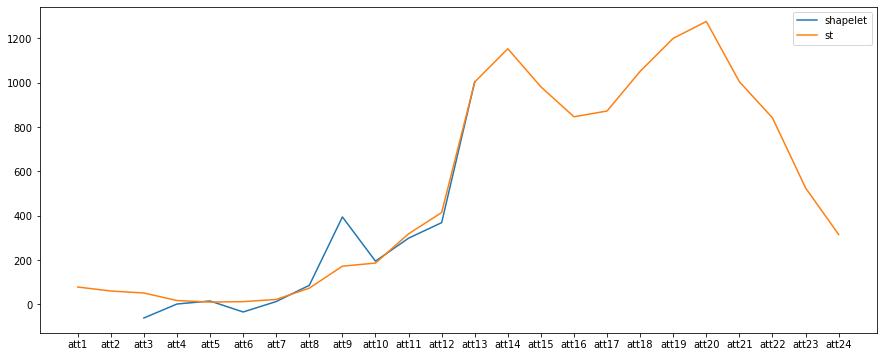

In [14]:
plt.figure(figsize=(15, 6))
pos = 0
shp = st_shapelets[pos]
plot_shapelet(shp, dataset, "shapelet")
plt.plot(dataset.loc[shp.series_id][:-1], label="st")
plt.legend()

In [15]:
origin = recover(shp, dataset)
origin_truth = dataset.loc[shp.series_id][shp.start_pos : shp.start_pos+len(shp.content)].values
print("Series ID:", shp.series_id, "Start Pos:", shp.start_pos, "Content:", len(shp.content))
print("SHAPELET :", shp.content)
print("RECOVERED:", origin)
print("ORIGIN   :", origin_truth)

Mean: 207.0909090909091 STD: 296.6315743630319
Series ID: 17 Start Pos: 2 Content: 11
SHAPELET : [-0.9060988801189972, -0.6938137975185251, -0.647875364776118, -0.8149611688215105, -0.6561169339648202, -0.40912856226931965, 0.63067659075371, -0.04206459284245878, 0.30759229547283823, 0.543641185195891, 2.688149228889309]
RECOVERED: [-61.68662824736916, 1.2838300181951467, 14.910619646345623, -34.6523054613522, 12.465910002679038, 85.73045954807706, 394.1694991200917, 194.61322269111062, 298.332495958956, 368.3520497441508, 1004.4808469791151]
ORIGIN   : [  51   17   10   12   22   73  172  186  318  414 1003]


In [16]:
(origin_truth - np.mean(origin_truth)) / np.std(origin_truth)

array([-0.55189515, -0.67210993, -0.69686004, -0.68978858, -0.65443129,
       -0.47410911, -0.12407194, -0.07457174,  0.39214448,  0.73157446,
        2.81411882])